# Resource constrained project scheduling
This is a port of the Python-MIP example at https://python-mip.readthedocs.io/en/latest/examples.html#resource-constrained-project-scheduling

In [1]:
%matplotlib widget
import processscheduler as ps

# Input
Compared to Python-MIP, there's no need to create dummy jobs

In [2]:
# total number of jobs
n = 10

# job durations
p = [3, 2, 5, 4, 2, 3, 4, 2, 4, 6]

# number of resources [c1, c2] required per for each job
u = [[5, 1], [0, 4], [1, 4], [1, 3], [3, 2], [3, 1], [2, 4], [4, 0], [5, 2], [2, 5]]
# number of resources c and c2
c = [6, 8]

# job dependencies/precedences
S = [
    [1, 4],
    [1, 5],
    [2, 9],
    [2, 10],
    [3, 8],
    [4, 6],
    [4, 7],
    [5, 9],
    [5, 10],
    [6, 8],
    [6, 9],
    [7, 8],
]

# Model creation

In [3]:
pb = ps.SchedulingProblem(name="ResourceConstrainedProject")
# create n jobs
jobs = [ps.FixedDurationTask(name="Job_%i" % (i + 1), duration=p[i]) for i in range(n)]
# create the resources
C1_Ress = [ps.Worker(name="C1_Ress_%i" % i) for i in range(c[0])]
C2_Ress = [ps.Worker(name="C2_Ress_%i" % i) for i in range(c[1])]
# job precedences
for index_job_before, index_job_after in S:
    ps.TaskPrecedence(
        task_before=jobs[index_job_before - 1], task_after=jobs[index_job_after - 1]
    )
# assign resources to jobs
i = 0
for u1, u2 in u:
    if u1 != 0:
        jobs[i].add_required_resource(
            ps.SelectWorkers(
                list_of_workers=C1_Ress, nb_workers_to_select=u1, kind="exact"
            )
        )
    if u2 != 0:
        jobs[i].add_required_resource(
            ps.SelectWorkers(
                list_of_workers=C2_Ress, nb_workers_to_select=u2, kind="exact"
            )
        )
    i += 1

# Makespan

In [4]:
# there may be several schedules, add the following constraint
# to find the solution available from the python-MIP documentation
ps.TaskStartAt(task=jobs[9], value=15)
ps.ObjectiveMinimizeMakespan()

MinimizeMakeSpan(<class 'processscheduler.objective.ObjectiveMinimizeMakespan'>)
0 assertion(s):

# Solve

In [5]:
solver = ps.SchedulingSolver(problem=pb)
solution = solver.solve()

Solver type:
	-> Standard SAT/SMT solver
Incremental optimizer:
	Found value: 34 elapsed time:0.216s
	Checking better value < 34
	Found value: 33 elapsed time:0.460s
	Checking better value < 33
	Found value: 32 elapsed time:0.469s
	Checking better value < 32
	Found value: 31 elapsed time:0.478s
	Checking better value < 31
	Found value: 30 elapsed time:0.486s
	Checking better value < 30
	Found value: 29 elapsed time:0.495s
	Checking better value < 29
	Found value: 28 elapsed time:0.503s
	Checking better value < 28
	Found value: 27 elapsed time:1.146s
	Checking better value < 27
	Found value: 26 elapsed time:1.776s
	Checking better value < 26
	Found value: 25 elapsed time:1.786s
	Checking better value < 25
	Found value: 24 elapsed time:3.058s
	Checking better value < 24
	Found value: 23 elapsed time:3.066s
	Checking better value < 23
	Found value: 22 elapsed time:3.091s
	Checking better value < 22
	Found value: 21 elapsed time:3.099s
	Checking better value < 21
	Can't find a better solut

# Render Gantt
The solution displayed below should the same as the Python-MIP optimum

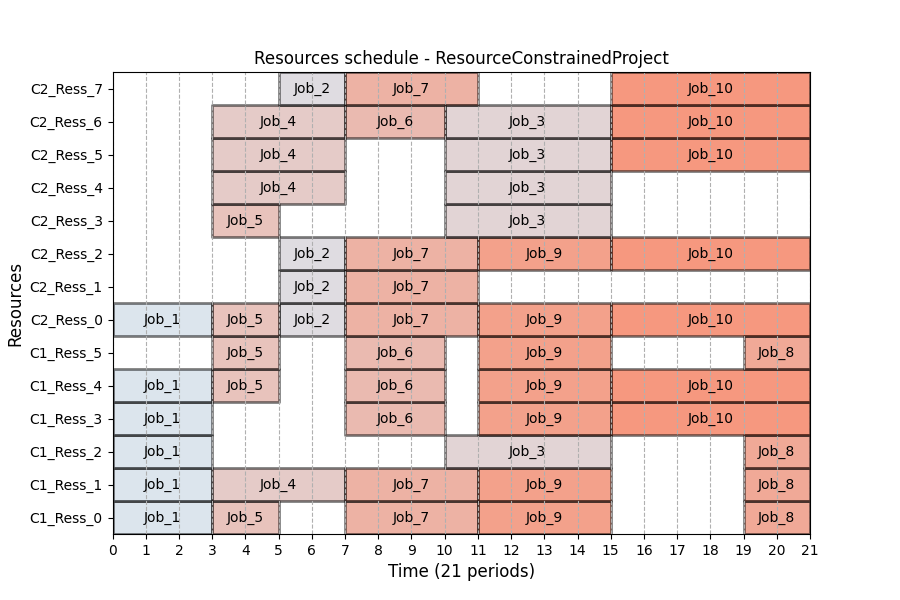

In [6]:
ps.render_gantt_matplotlib(solution)